In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
x0, x1, y = np.loadtxt("ex2data1.txt", dtype=np.float32, comments="#", delimiter=",", unpack=True)
m = len(y)
theta = np.zeros(3, dtype=np.float32)
iterations = 1500
alpha = 0.01

In [39]:
x0 = [[(i-np.amin(x0))/(np.amax(x0)-np.amin(x0))] for i in x0]
x1 = [[(i-np.amin(x1))/(np.amax(x1)-np.amin(x1))] for i in x1]
X = np.concatenate(([[1] for _ in range(m)], x0, x1), axis=1)

In [40]:
def cost_function(X, y, theta):
    h = 1/(1 + np.exp(-X.dot(theta)))
    cost_1 = np.log(h)
    cost_2 = np.array([np.log(1-i) for i in h])
    summ = y.dot(cost_1) + np.array([1-i for i in y]).dot(cost_2)
    return -summ/m

In [41]:
print(cost_function(X, y, theta))

0.6931471805599452


In [42]:
j_history = np.array([0 for _ in range(iterations)], dtype=np.float32)
for i in range(iterations):    
    temp = [0 for _ in range(3)]
    for j in range(3):
        h = 1/(1 + np.exp(-X.dot(theta)))
        temp[j] = theta[j] - (alpha/m) * np.sum((h-y) * np.array(X[:, j]))
    theta = temp
    j_history[i] = cost_function(X, y, theta)

In [43]:
print(theta)

[-0.26924304545231487, 0.8960827348156859, 0.7665344950391781]


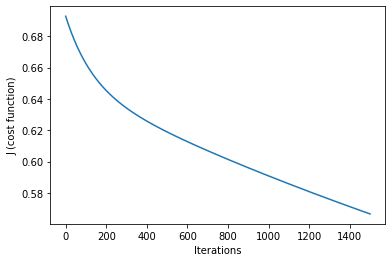

In [44]:
plt.plot(np.arange(0, iterations), j_history)
plt.ylabel('J (cost function)')
plt.xlabel('Iterations')
plt.show()

In [45]:
ex = np.array([1, (45-np.amin(x0))/(np.amax(x0)-np.amin(x0)), (85-np.amin(x1))/(np.amax(x1)-np.amin(x1))])
print(1/(1 + np.exp(-ex.dot(theta))))

1.0
